MEM T380

Case Studies Group 10

Ante Sokosa  
Ziad Hatab

HW3 - Regression Prediction of Bead Geometry for GMAW-based Rapid Manufacturing

In [1]:
# for calculating notebook runtime (see total at end of notebook)
import time
start_time = time.time()

# 1 &nbsp; `Data Exploration`

In [2]:
import pandas as pd
import numpy as np

df_train_raw = pd.read_excel('bead_geometry.xlsx', sheet_name='training_data')
df_test_raw = pd.read_excel('bead_geometry.xlsx', sheet_name='testing_data')
df_all_raw = pd.concat([df_train_raw, df_test_raw], ignore_index=True)
df_all_raw.head()

,F,S,V,D,W,H
0,3.6,22.5,17.5,9,8.95,2.88
1,5.2,22.5,17.5,9,10.72,3.35
2,3.6,37.5,17.5,9,7.19,2.45
3,5.2,37.5,17.5,9,8.29,2.75
4,3.6,22.5,20.5,9,10.25,2.66


The column names in our dataset are not clear at first but can be quickly understood, thus we will keep the names as they are.  
For reference we will list the column names and their meaning as established by the research paper, below:

independent variables / predictors / regressors:
- **F** = **Feed** Rate (m/mm)
- **S** = Welding **Speed** (cm/min) 
- **V** = Arc **Voltage** (V)
- **D** = Nozzle-to-Plate **Distance** (mm)
 
dependent variables / response:
- **W** = **Width** of Bead (mm)
- **H** = **Height** of Bead (mm)

In [3]:
independent_vars = ['F','S','V','D']
dependent_vars = ['W','H']

In [4]:
df_all_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       43 non-null     float64
 1   S       43 non-null     float64
 2   V       43 non-null     float64
 3   D       43 non-null     int64  
 4   W       43 non-null     float64
 5   H       43 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


The dataframe does not have any missing values.  
However, `Distance` is an int and not a float, thus it may have non continuous values. Lets investigate this further.

In [5]:
df_all_raw['D'].value_counts()

12    25
9      8
15     8
6      1
18     1
Name: D, dtype: int64

We were correct to assume that `Distance` has not many continuous values. It has only 3 main unique values with an additional 2 unique values but they are only 1 each.

In [6]:
df_all_raw['F'].value_counts()

4.4    14
5.2    12
3.6     8
4.0     5
6.0     3
2.8     1
Name: F, dtype: int64

However, other feature columns also have few unique values as seen with `Feed` above. Thus, we will leave `Distance` as is, even making it a float column as in the research paper. It does not need to be made categorical.

In [7]:
df_train_raw['D'] = df_train_raw['D'].astype(float)
df_test_raw['D'] = df_test_raw['D'].astype(float)
df_all_raw['D'] = df_all_raw['D'].astype(float)
df_all_raw.head()

,F,S,V,D,W,H
0,3.6,22.5,17.5,9.0,8.95,2.88
1,5.2,22.5,17.5,9.0,10.72,3.35
2,3.6,37.5,17.5,9.0,7.19,2.45
3,5.2,37.5,17.5,9.0,8.29,2.75
4,3.6,22.5,20.5,9.0,10.25,2.66


In [8]:
df_all_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       43 non-null     float64
 1   S       43 non-null     float64
 2   V       43 non-null     float64
 3   D       43 non-null     float64
 4   W       43 non-null     float64
 5   H       43 non-null     float64
dtypes: float64(6)
memory usage: 2.1 KB


In [9]:
df_all_raw.describe()

,F,S,V,D,W,H
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,4.502326,30.279070,18.793023,12.000000,8.997326,2.865419
std,0.746257,6.540444,1.365980,2.267787,1.226242,0.358247
min,2.800000,15.000000,16.000000,6.000000,6.830000,2.170000
25%,4.000000,24.750000,17.500000,12.000000,8.030000,2.681000
50%,4.400000,30.000000,19.000000,12.000000,8.920000,2.811000
75%,5.200000,37.500000,19.650000,12.000000,9.874500,3.023500
max,6.000000,45.000000,22.000000,18.000000,11.760000,3.800000


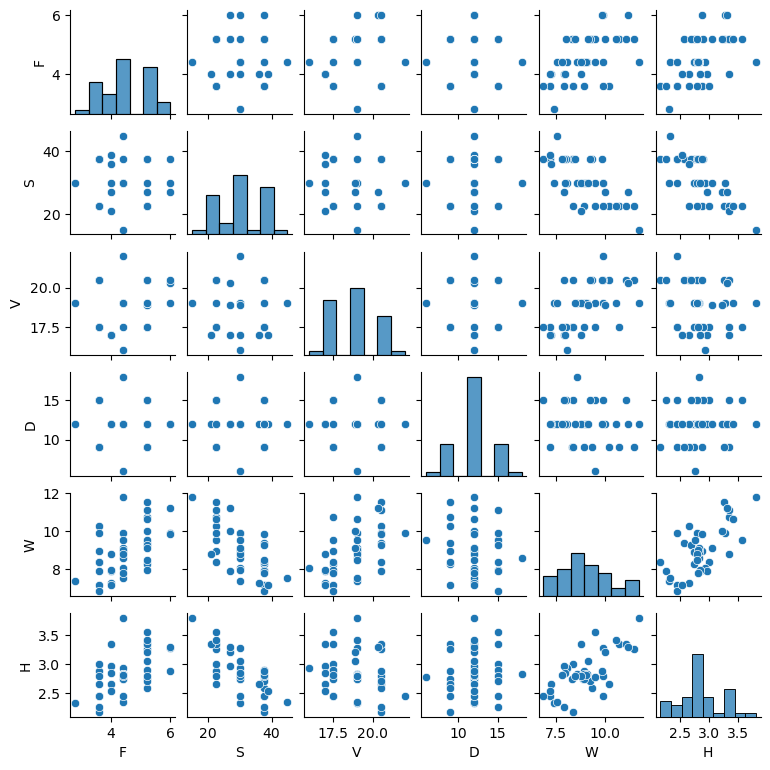

In [10]:
import seaborn as sns

sns.pairplot(df_all_raw, height=1.3)

We are able to see a clear linear trend between `Width` and `Height` of the bead.  
From independent variables to other independent variables we do not see any clear trends.  
However, this makes sense as they are independent variables.  
We do see slight trends between independent variables and dependent variables. 
 
For example, `Width` and `Height` seem to generally increase with `Feed` and decrease with `Speed`. However, as `Voltage` increases, `Width` increases while `Height` dereases. The same happends with `Distance` but to a lesser extent, even being a stretch to call it a trend. However, perhaps a combination of all of these independent variables will show a clearer trend.

Lets check visual inferences from the scatter plot of the data with a correlation matrix.

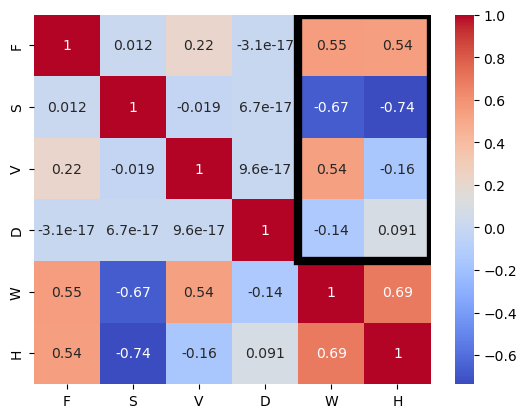

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

corr_raw = df_all_raw.corr()
ax = sns.heatmap(corr_raw, annot=True, cmap='coolwarm')

rectangle = Rectangle((4, 0), 2, 4, fill=False, edgecolor='black', lw=6)
ax.add_patch(rectangle)
plt.draw()

plt.show()

Our visual inferences were mostly correct. There is little to no correlation between independent variables. We were correct in our inferences of `Feed`, `Speed`, and `Voltage` with `Width` and `Height`. However, we were incorrect in `Distance` vs `Width` and `Height`. It is slightly opposite of what we visually inferred. The main cells of the heatmap we are intereted in are boxed in black on the correlation matrix heatmap above. 

Additionally, standardization may be able to help. (We will use standardization, not 0-1 normalization partially due to the one off unique type values we found in some columns suh as `Distance` and `Feed` earlier. We don't want them to squeeze any features into a small range.)

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_all_raw_std = std_scaler.fit_transform(df_all_raw)
df_all_raw_std = pd.DataFrame(df_all_raw_std, columns=df_all_raw.columns)
df_all_raw_std.describe()

,F,S,V,D,W,H
count,4.300000e+01,4.300000e+01,4.300000e+01,43.000000,4.300000e+01,4.300000e+01
mean,4.853998e-16,-6.196594e-17,4.182701e-16,0.000000,-7.126083e-16,8.200804e-16
std,1.011835e+00,1.011835e+00,1.011835e+00,1.011835,1.011835e+00,1.011835e+00
min,-2.308149e+00,-2.363738e+00,-2.068901e+00,-2.677063,-1.788371e+00,-1.964142e+00
25%,-6.810932e-01,-8.553708e-01,-9.577925e-01,0.000000,-7.981898e-01,-5.208723e-01
50%,-1.387412e-01,-4.317329e-02,1.533157e-01,0.000000,-6.380529e-02,-1.537000e-01
75%,9.459628e-01,1.117109e+00,6.347959e-01,0.000000,7.238014e-01,4.464854e-01
max,2.030667e+00,2.277391e+00,2.375532e+00,2.677063,2.279624e+00,2.639634e+00


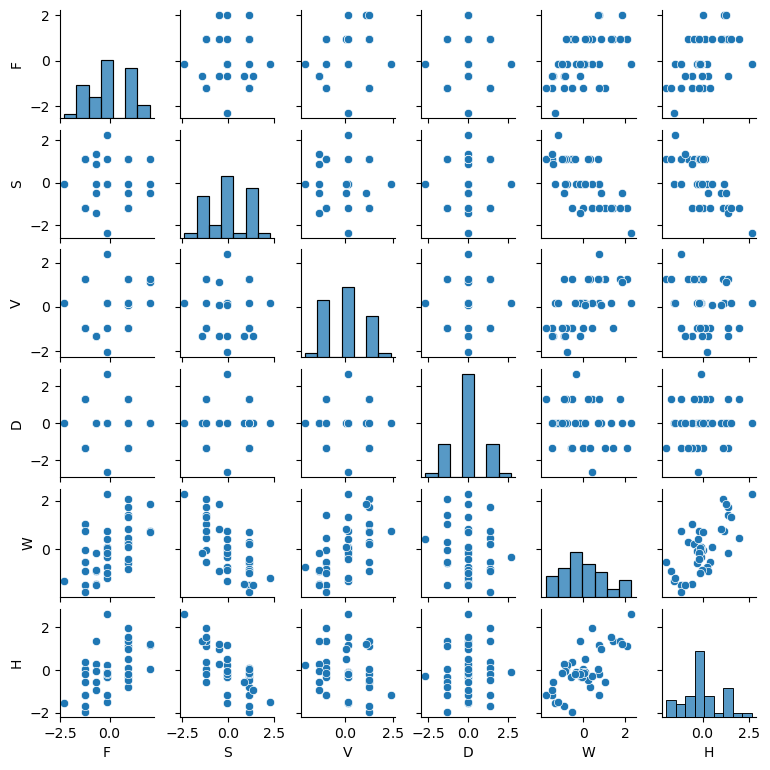

In [13]:
sns.pairplot(df_all_raw_std, height=1.3)

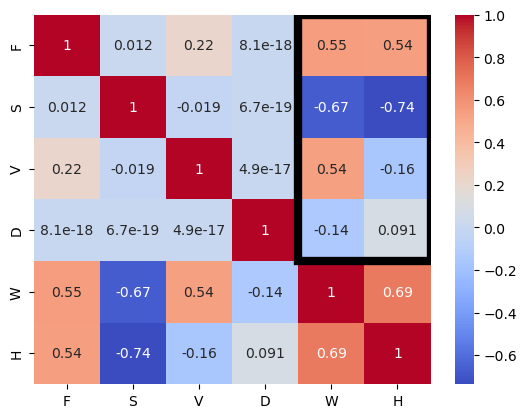

In [14]:
corr_raw_std = df_all_raw_std.corr()
ax_std = sns.heatmap(corr_raw_std, annot=True, cmap='coolwarm')

rectangle = Rectangle((4, 0), 2, 4, fill=False, edgecolor='black', lw=6)
ax_std.add_patch(rectangle)
plt.draw()

plt.show()

Standardization didn't make much of a difference for us to see any trends clearer. However, we will stick with this as the data for our regrssion analysis.

In [15]:
df_train_raw_std = std_scaler.fit_transform(df_train_raw)
df_train_raw_std = pd.DataFrame(df_train_raw_std, columns=df_train_raw.columns)
df_test_raw_std = std_scaler.fit_transform(df_test_raw)
df_test_raw_std = pd.DataFrame(df_test_raw_std, columns=df_test_raw.columns)

df_train = df_train_raw_std.copy()
df_test = df_test_raw_std.copy()
df_all = df_all_raw_std.copy()

df_all.head()

,F,S,V,D,W,H
0,-1.223445,-1.203455,-0.957793,-1.338532,-0.039051,0.041184
1,0.945963,-1.203455,-0.957793,-1.338532,1.421467,1.368653
2,-1.223445,1.117109,-0.957793,-1.338532,-1.491317,-1.173309
3,0.945963,1.117109,-0.957793,-1.338532,-0.583650,-0.325989
4,-1.223445,-1.203455,1.264424,-1.338532,1.033646,-0.580185


In conclusion of our data exploration, `Feed`, `Speed`, and `Voltage` seem to be the most important features for predicting `Width` and `Height` of the bead, with `Speed` being the strongest. (`Voltage` has a much lower impact on `Height` than `Width` though.) `Distance` is not as important but still has some effect on the bead geometry (more so for `Width` than `Height`).

# 2 &nbsp; `Regression with Ordinary Least-Squares (OLS)`



## 2.1 &nbsp; `Simple Linear Regression`



Using our strongest independebnt and dependent variables, `Speed` and `Height` respectively, we can write down the mathematical expression for the linear univariate model:  
$H = \beta_0 + \beta_1 * S + \epsilon$  
where $\beta_0$ is the intercept, $\beta_1$ is the slope, and $\epsilon$ is the error term.

We can crease this simple linear model as such:

In [16]:
from sklearn.linear_model import LinearRegression

x_S_all = df_all[['S']]  # double brackets keep x as a DataFrame even though it is only one column. using lowercase x though
y_H_all = df_all['H']

SLR_model_S_H = LinearRegression()
SLR_model_S_H.fit(x_S_all, y_H_all)

print('Intercept:         ', SLR_model_S_H.intercept_)
print('Coefficient/Slope: ', SLR_model_S_H.coef_)
print('R^2:               ', SLR_model_S_H.score(x_S_all,y_H_all))

Intercept:          7.744236350924402e-16
Coefficient/Slope:  [-0.73680485]
R^2:                0.5428813918395083


As the data was standerdized, the intercept as expected is ~0.  
The slope is ~-0.74, which means that for every 1 unit increase in `Speed`, `Height` decreases by ~0.74 units. This is exactly as shown in the correlation matrix heatmap before.  
The $R^2$ value of ~0.54 means that the model explains only 54% of the variability of the data. 46% of the data will be way off the regression line. This is a bad model, and we are not even using different training and testing sets yet!  
We can see this simple model visualized in the plot below:

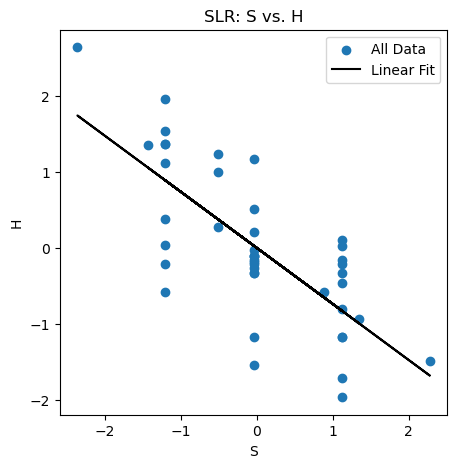

In [17]:
df_all['H_pred_from_S'] = SLR_model_S_H.predict(x_S_all)

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.scatter(df_all['S'], df_all['H'], label='All Data')
ax1.plot(df_all['S'], df_all['H_pred_from_S'], color='black', label='Linear Fit')
ax1.set_xlabel('S')
ax1.set_ylabel('H')
ax1.set_title('SLR: S vs. H')
ax1.legend()
plt.show()


Lets take a look at the second strongest independent variable, `Feed` and the other dependent variable, `Width`.  
We can do the same analysis as with `Speed` and `Height` above.

In [18]:
x_F_all = df_all[['F']]
y_W_all = df_all['W']

SLR_model_F_W = LinearRegression()
SLR_model_F_W.fit(x_F_all, y_W_all)

print('Intercept:         ', SLR_model_F_W.intercept_)
print('Coefficient/Slope: ', SLR_model_F_W.coef_)
print('R^2:               ', SLR_model_F_W.score(x_F_all,y_W_all))

Intercept:          -9.786784380785485e-16
Coefficient/Slope:  [0.5481464]
R^2:                0.3004644747714442


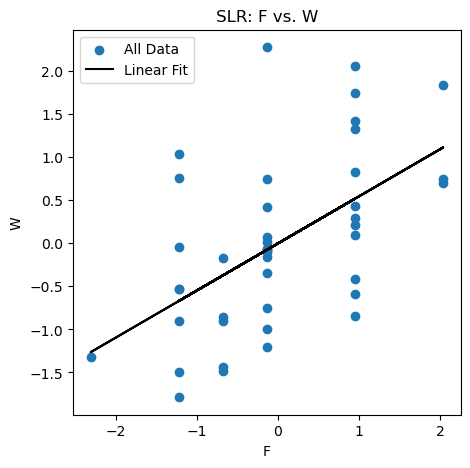

In [19]:
df_all['W_pred_from_F'] = SLR_model_F_W.predict(x_F_all)

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.scatter(df_all['F'], df_all['W'], label='All Data')
ax1.plot(df_all['F'], df_all['W_pred_from_F'], color='black', label='Linear Fit')
ax1.set_xlabel('F')
ax1.set_ylabel('W')
ax1.set_title('SLR: F vs. W')
ax1.legend()
plt.show()

Again we see the 0 intercept, slope as in the correlation matrix heatmap, and an even lower $R^2$ value. These models are not adequate to fit the data.  
We need to combine more independent variables to get a better model for more correct predictions.

## 2.2 &nbsp; `Multivariable Polynomial Regression`



In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# create all polynomial features up to degree 2 (including interaction terms)
MSDR_poly_W = PolynomialFeatures(degree=2, include_bias=False)
MSDR_poly_H = PolynomialFeatures(degree=2, include_bias=False) # was getting unknown data leakage / variable altering when W and H weren't separate so had to make second one

# MSDR = Multivariable Second-Degree Regression
MSDR_W = LinearRegression()
MSDR_H = LinearRegression() 

# make_pipeline first transforms the features to polynomial features, then applies linear regression
MSDR_model_W = make_pipeline(MSDR_poly_W, MSDR_W)
MSDR_model_H = make_pipeline(MSDR_poly_H, MSDR_H)

# feature names for 2nd degree polynomial
feature_names = independent_vars + ['F^2','S^2','V^2','D^2'] + ['F*S', 'F*V', 'F*D','S*V', 'S*D', 'V*D']


# W
X_train_W = df_train[independent_vars]
X_test_W = df_test[independent_vars]
y_train_W = df_train['W']
y_test_W = df_test['W']

MSDR_model_W.fit(X_train_W, y_train_W)

print(f'Model coefficients for W:')
print('Intercept:', MSDR_model_W.named_steps['linearregression'].intercept_)
        
coefficients_W = MSDR_model_W.named_steps['linearregression'].coef_

for feature_name, coeff in zip(feature_names, coefficients_W):
    print(f'{feature_name}: {coeff}')

print('R^2 value training set:', MSDR_model_W.score(X_train_W,y_train_W))
print('R^2 value testing  set:', MSDR_model_W.score(X_test_W,y_test_W))
print('\n')


# H
X_train_H = df_train[independent_vars]
X_test_H = df_test[independent_vars]
y_train_H = df_train['H']
y_test_H = df_test['H']

MSDR_model_H.fit(X_train_H, y_train_H)

print(f'Model coefficients for H:')
print('Intercept:', MSDR_model_H.named_steps['linearregression'].intercept_)
        
coefficients_H = MSDR_model_H.named_steps['linearregression'].coef_

for feature_name, coeff in zip(feature_names, coefficients_H):
    print(f'{feature_name}: {coeff}')

print('R^2 value training set:', MSDR_model_H.score(X_train_H,y_train_H))
print('R^2 value testing  set:', MSDR_model_H.score(X_test_H,y_test_H))

Model coefficients for W:
Intercept: -0.10195499700587468
F: 0.4644680618317247
S: -0.7323588531685801
V: 0.41733912631875925
D: -0.1730128027383858
F^2: -0.04612528247570835
S^2: -0.03273784307528102
V^2: -0.016368921537640444
D^2: -0.010639798999466401
F*S: 0.11838237897757883
F*V: -0.02700872053710706
F*D: 0.052380548920449854
S*V: 0.01034749682915133
S*D: 0.04910676461292158
V*D: 0.01935040367485357
R^2 value training set: 0.9896894480390439
R^2 value testing  set: 0.9219455266031096


Model coefficients for H:
Intercept: -0.06749653951574566
F: 0.5636272501722791
S: -0.7413030908570605
V: -0.25170744097010717
D: 0.10167006439184738
F^2: -0.004621775913532115
S^2: -0.07686416586397948
V^2: 0.029963996862229426
D^2: 0.02996399686222944
F*S: 0.13607873109171845
F*V: -0.014330607194979422
F*D: -0.02475286697314596
S*V: -0.05933863974890757
S*D: -0.006513912361354202
V*D: -0.004621775913532272
R^2 value training set: 0.9856702023184508
R^2 value testing  set: 0.937031679429238


These polynomial models here in `2.2` perform much better than the simple linear regression models from `2.1`. The $R^2$ values for both dependent variables are now much higher. For both the training and testing sets and for both `Width` and `Height`, the $R^2$ value is above 0.92. This is due to including all features instead of just 1, and also due to the interatcions between them.

&nbsp;

## 2.3 &nbsp; `Predicting with Multivariable Polynomial Regression`



In [21]:
df_test.head() # bead_geometry_gmaw_test data as standerdized in data exploration

,F,S,V,D,W,H
0,-1.013501,-1.655212,-0.984366,0.0,-0.039867,1.336573
1,-1.013501,-0.662085,-0.984366,0.0,-0.746089,-0.086558
2,-1.013501,-0.165521,-0.984366,0.0,-0.702883,-0.482078
3,-1.013501,0.827606,-0.984366,0.0,-1.256705,-1.191796
4,-1.013501,1.324169,-0.984366,0.0,-1.300697,-1.668637


In [22]:
df_test['W_pred'] = MSDR_model_W.predict(df_test[independent_vars])
df_test['H_pred'] = MSDR_model_H.predict(df_test[independent_vars])
df_test

,F,S,V,D,W,H,W_pred,H_pred
0,-1.013501,-1.655212,-0.984366,0.0,-0.039867,1.336573,0.400427,1.024226
1,-1.013501,-0.662085,-0.984366,0.0,-0.746089,-0.086558,-0.539985,0.066227
2,-1.013501,-0.165521,-0.984366,0.0,-0.702883,-0.482078,-0.922620,-0.312112
3,-1.013501,0.827606,-0.984366,0.0,-1.256705,-1.191796,-1.512749,-0.867468
4,-1.013501,1.324169,-0.984366,0.0,-1.300697,-1.668637,-1.720244,-1.044485
5,0.572848,-0.662085,0.501962,0.0,0.905951,0.863428,0.914537,0.705549
6,0.572848,-0.165521,0.501962,0.0,0.209942,0.231336,0.486180,0.256085
7,1.630415,-0.662085,1.597151,0.0,1.872980,1.181322,1.783709,1.012393
8,0.572848,-1.406930,0.580189,0.0,1.383574,1.576842,1.702299,1.483776
9,0.572848,1.075888,0.580189,0.0,-0.278679,-0.718651,-0.298783,-0.598555


In [23]:
# printing the R^2 values again for the testing set this time with r2_score instead of .score

from sklearn.metrics import r2_score

print('R^2 value for W:', r2_score(df_test['W'], df_test['W_pred']))
print('R^2 value for H:', r2_score(df_test['H'], df_test['H_pred']))

R^2 value for W: 0.9219455266031096
R^2 value for H: 0.937031679429238


In [24]:
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt

RSME_W = sqrt(mean_squared_error(df_test['W'], df_test['W_pred']))
print(f'RMSE for W: {RSME_W:0.4f}')
RSME_H = sqrt(mean_squared_error(df_test['H'], df_test['H_pred']))
print(f'RMSE for H: {RSME_H:0.4f}')

RMSE for W: 0.2794
RMSE for H: 0.2509


In [25]:
# Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

MAPE_W = mean_absolute_percentage_error(df_test['W'], df_test['W_pred'])
print(f'MAPE for W: {MAPE_W:.2f}%')
MAPE_H = mean_absolute_percentage_error(df_test['H'], df_test['H_pred'])
print(f'MAPE for H: {MAPE_H:.2f}%')

MAPE for W: 122.12%
MAPE for H: 34.56%


If someone only looked at the $R^2$ values, and even RMSE values of shown above, they would think that the model is good for predicting anything it was trained for. However, we can see that the MAPE value are very high for `Width`. This metric is very sensitive to when true values are small. This model is not good at predicting `Width` with feature outliers. Or, our input data can have an outlier in it due to incorrect data entry throwing it off which would be resolved if more strict data cleanup was performed.

# 3 &nbsp; `Regression with Decision Trees (RDT)`



We will create a few different decision tree models for both `Width` and `Height` utilizing different parameters and compare them to one another in a heatmap.

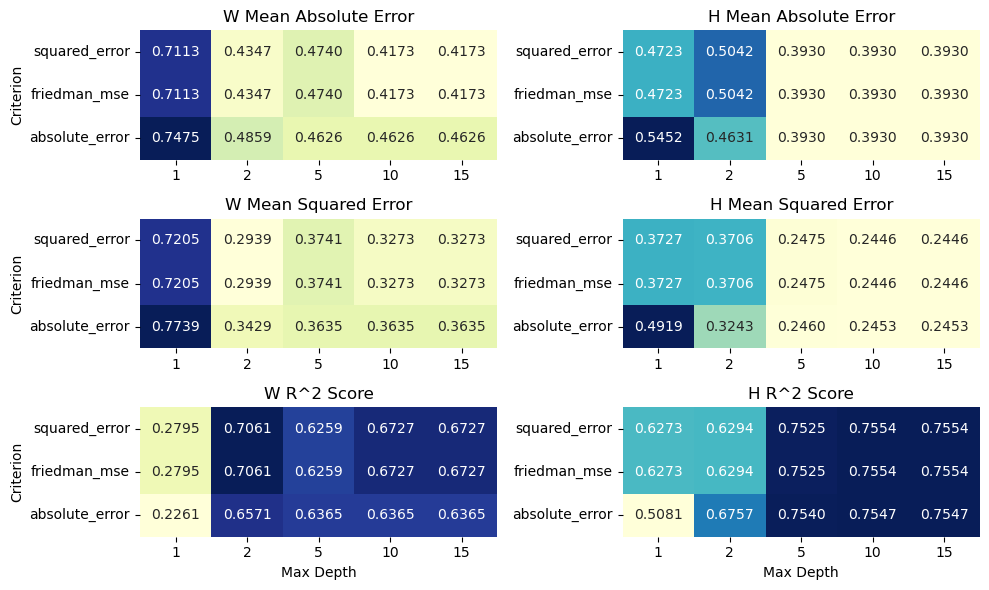

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

crits = ['squared_error', 'friedman_mse', 'absolute_error']
depths = [1, 2, 5, 10, 15]

# Initialize dataframes
W_mae = pd.DataFrame(index=crits, columns=depths)
H_mae = pd.DataFrame(index=crits, columns=depths)
W_mse = pd.DataFrame(index=crits, columns=depths)
H_mse = pd.DataFrame(index=crits, columns=depths)
W_r2 = pd.DataFrame(index=crits, columns=depths)
H_r2 = pd.DataFrame(index=crits, columns=depths)

for crit in crits:
    for depth in depths:

        rdt_W = DecisionTreeRegressor(max_depth=depth, criterion=crit, random_state=42)
        rdt_H = DecisionTreeRegressor(max_depth=depth, criterion=crit, random_state=42)

        # split data into training and testing sets
        X_train = df_train[independent_vars]
        X_test = df_test[independent_vars]
        y_train_W = df_train['W']
        y_test_W = df_test['W']
        y_train_H = df_train['H']
        y_test_H = df_test['H']

        # fit grid
        rdt_W.fit(X_train, y_train_W)
        rdt_H.fit(X_train, y_train_H)

        # make predictions
        y_pred_W = rdt_W.predict(X_test)
        y_pred_H = rdt_H.predict(X_test)

        # calculate and store metrics
        W_mae.loc[crit, depth] = mean_absolute_error(y_test_W, y_pred_W)
        H_mae.loc[crit, depth] = mean_absolute_error(y_test_H, y_pred_H)
        W_mse.loc[crit, depth] = mean_squared_error(y_test_W, y_pred_W)
        H_mse.loc[crit, depth] = mean_squared_error(y_test_H, y_pred_H)
        W_r2.loc[crit, depth] = r2_score(y_test_W, y_pred_W)
        H_r2.loc[crit, depth] = r2_score(y_test_H, y_pred_H)

# plot heatmaps
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
sns.heatmap(W_mae.astype(float), annot=True, cmap='YlGnBu', fmt='.4f', ax=axes[0,0], cbar=False)
axes[0,0].set_title('W Mean Absolute Error')
axes[0,0].set_ylabel('Criterion')

sns.heatmap(H_mae.astype(float), annot=True, cmap='YlGnBu', fmt='.4f', ax=axes[0,1], cbar=False)
axes[0,1].set_title('H Mean Absolute Error')

sns.heatmap(W_mse.astype(float), annot=True, cmap='YlGnBu', fmt='.4f', ax=axes[1,0], cbar=False)
axes[1,0].set_title('W Mean Squared Error')
axes[1,0].set_ylabel('Criterion')

sns.heatmap(H_mse.astype(float), annot=True, cmap='YlGnBu', fmt='.4f', ax=axes[1,1], cbar=False)
axes[1,1].set_title('H Mean Squared Error')

sns.heatmap(W_r2.astype(float), annot=True, cmap='YlGnBu', fmt='.4f', ax=axes[2,0], cbar=False)
axes[2,0].set_title('W R^2 Score')
axes[2,0].set_ylabel('Criterion')
axes[2,0].set_xlabel('Max Depth')

sns.heatmap(H_r2.astype(float), annot=True, cmap='YlGnBu', fmt='.4f', ax=axes[2,1], cbar=False)
axes[2,1].set_title('H R^2 Score')
axes[2,1].set_xlabel('Max Depth')

plt.tight_layout()
plt.show()

As we can see, none of these models are very good. In some cases, the $R^2$ values are even lower than in simple linear regression, and in other cases, it is a bit better.  
To get a balance between overfitting, underfitting, and accuracy, we will manually decide what parameters to use based of of the heatmaps above.  
For `Width` will use a model with `max_depth` of `2` and a `criterion` of `squared_error`.  
For `Height` will use a model with `max_depth` of `10` and a `criterion` of `aboslute_error`.  
We can now make the models again with these parameters:

In [27]:
rdt_W = DecisionTreeRegressor(max_depth=2, criterion="squared_error", random_state=42)
rdt_H = DecisionTreeRegressor(max_depth=10, criterion="absolute_error", random_state=42)

# fit
rdt_W.fit(X_train, y_train_W)
rdt_H.fit(X_train, y_train_H)

# predict
y_pred_W = rdt_W.predict(X_test)
y_pred_H = rdt_H.predict(X_test)

print(f"W Mean Absolute Error: {mean_absolute_error(y_test_W, y_pred_W):.4f}")
print(f"W Mean Squared Error : {mean_squared_error(y_test_W, y_pred_W):.4f}")
print(f"W R^2 Score          : {r2_score(y_test_W, y_pred_W):.4f}")

print(f"H Mean Absolute Error: {mean_absolute_error(y_test_H, y_pred_H):.4f}")
print(f"H Mean Squared Error : {mean_squared_error(y_test_H, y_pred_H):.4f}")
print(f"H R^2 Score          : {r2_score(y_test_H, y_pred_H):.4f}")

W Mean Absolute Error: 0.4347
W Mean Squared Error : 0.2939
W R^2 Score          : 0.7061
H Mean Absolute Error: 0.3930
H Mean Squared Error : 0.2453
H R^2 Score          : 0.7547


We can also visualize these decision trees and print their text representations:

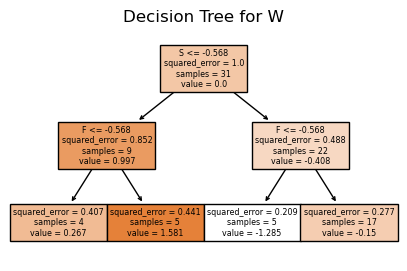

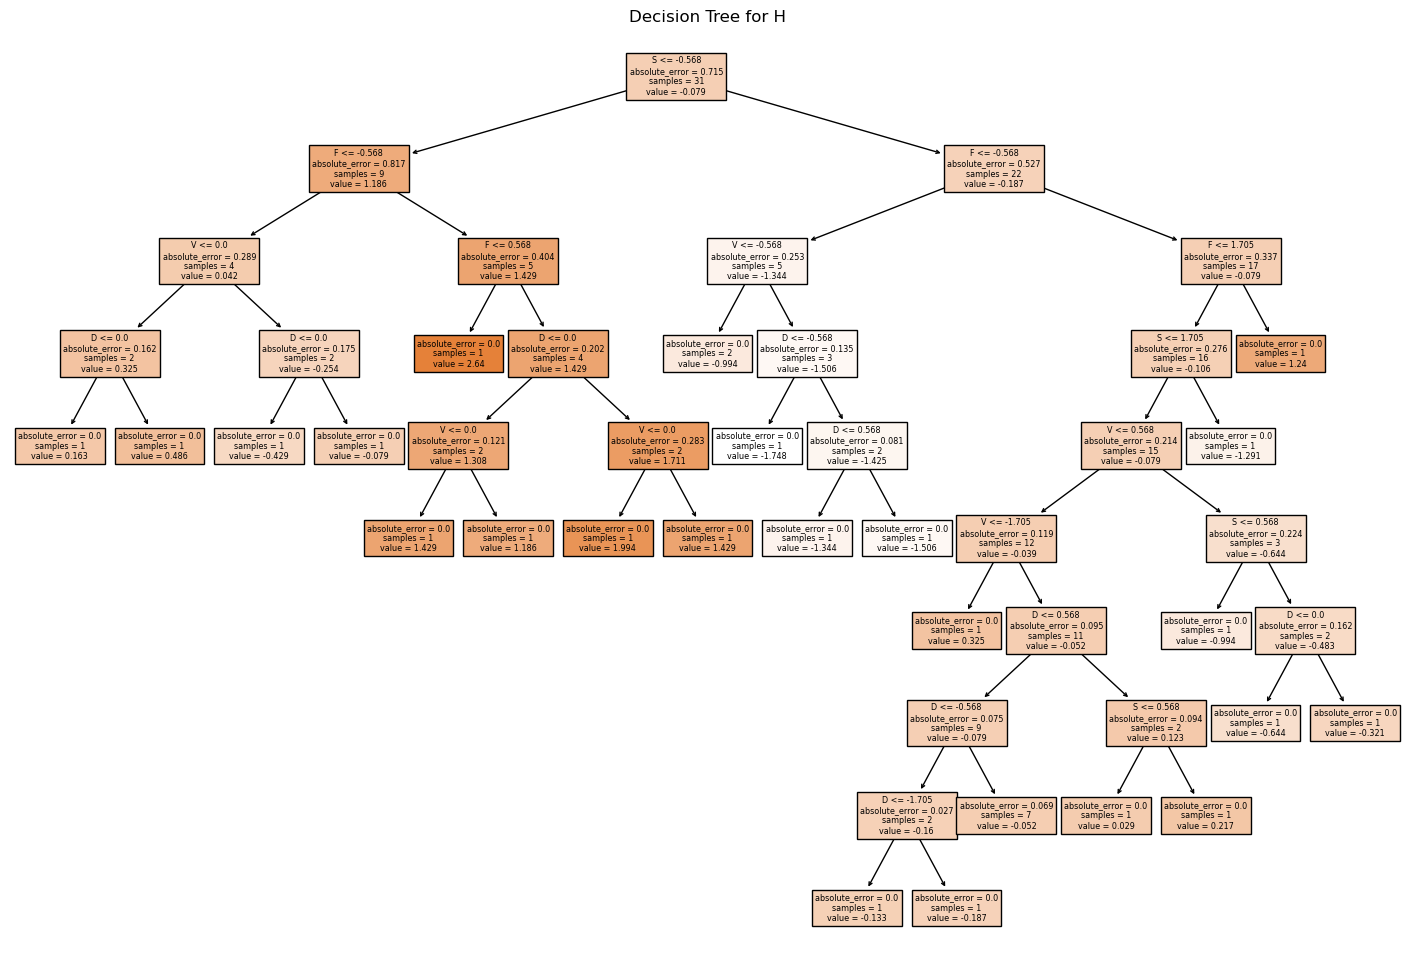

Decision Tree for W:
|--- S <= -0.57
|   |--- F <= -0.57
|   |   |--- value: [0.27]
|   |--- F >  -0.57
|   |   |--- value: [1.58]
|--- S >  -0.57
|   |--- F <= -0.57
|   |   |--- value: [-1.28]
|   |--- F >  -0.57
|   |   |--- value: [-0.15]

Decision Tree for H:
|--- S <= -0.57
|   |--- F <= -0.57
|   |   |--- V <= 0.00
|   |   |   |--- D <= 0.00
|   |   |   |   |--- value: [0.16]
|   |   |   |--- D >  0.00
|   |   |   |   |--- value: [0.49]
|   |   |--- V >  0.00
|   |   |   |--- D <= 0.00
|   |   |   |   |--- value: [-0.43]
|   |   |   |--- D >  0.00
|   |   |   |   |--- value: [-0.08]
|   |--- F >  -0.57
|   |   |--- F <= 0.57
|   |   |   |--- value: [2.64]
|   |   |--- F >  0.57
|   |   |   |--- D <= 0.00
|   |   |   |   |--- V <= 0.00
|   |   |   |   |   |--- value: [1.43]
|   |   |   |   |--- V >  0.00
|   |   |   |   |   |--- value: [1.19]
|   |   |   |--- D >  0.00
|   |   |   |   |--- V <= 0.00
|   |   |   |   |   |--- value: [1.99]
|   |   |   |   |--- V >  0.00
|   |   |  

In [28]:
from sklearn import tree

# Visualize the decision tree for W
plt.figure(figsize=(5, 3))
tree.plot_tree(rdt_W, feature_names=independent_vars, filled=True)
plt.title('Decision Tree for W')
plt.show()

# Visualize the decision tree for H
plt.figure(figsize=(18, 12))
tree.plot_tree(rdt_H, feature_names=independent_vars, filled=True)
plt.title('Decision Tree for H')
plt.show()


from sklearn.tree import export_text

# Print the text description of the decision tree for W
text_desc_W = export_text(rdt_W, feature_names=independent_vars)
print("Decision Tree for W:")
print(text_desc_W)

# Print the text description of the decision tree for H
text_desc_H = export_text(rdt_H, feature_names=independent_vars)
print("Decision Tree for H:")
print(text_desc_H)

We can also make a Random Forest Model for this data to see if we can do better than the simipler decision tree models above.

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr_W = RandomForestRegressor(n_estimators=200, bootstrap=True, max_features='sqrt', random_state=42)
rfr_H = RandomForestRegressor(n_estimators=200, bootstrap=True, max_features='sqrt', random_state=42)

# fit 
rfr_W.fit(X_train, y_train_W)
rfr_H.fit(X_train, y_train_H)

# predict
y_pred_W = rfr_W.predict(X_test)
y_pred_H = rfr_H.predict(X_test)

print(f"W Mean Absolute Error: {mean_absolute_error(y_test_W, y_pred_W):.4f}")
print(f"W Mean Squared Error : {mean_squared_error(y_test_W, y_pred_W):.4f}")
print(f"W R^2 Score          : {r2_score(y_test_W, y_pred_W):.4f}")

print(f"H Mean Absolute Error: {mean_absolute_error(y_test_H, y_pred_H):.4f}")
print(f"H Mean Squared Error : {mean_squared_error(y_test_H, y_pred_H):.4f}")
print(f"H R^2 Score          : {r2_score(y_test_H, y_pred_H):.4f}")

W Mean Absolute Error: 0.2776
W Mean Squared Error : 0.1205
W R^2 Score          : 0.8795
H Mean Absolute Error: 0.3428
H Mean Squared Error : 0.2002
H R^2 Score          : 0.7998


We get much better results with the Random Forest Model. The $R^2$ values are slightly higher than the decision tree models which is great, but even better note how much lower the Mean Squared Error is in these Random Forest Models than the simple decision tree models.

Let's investigate further by iterating over n_estimators values from 1 to 1000 and plotting the $R^2$ values.

In [30]:
# create a list of n_estimators
n_estimators = list(range(1, 1001, 5)) # start, stop, step (increase setp to speed up runtime)

# create an empty list to store r2 scores
r2_scores_W = []
r2_scores_H = []

# loop over n_estimators
for n in n_estimators:
    rfr_W = RandomForestRegressor(n_estimators=n, bootstrap=True, max_features='sqrt', random_state=42)
    rfr_H = RandomForestRegressor(n_estimators=n, bootstrap=True, max_features='sqrt', random_state=42)
    rfr_W.fit(X_train, y_train_W)
    rfr_H.fit(X_train, y_train_H)
    y_pred_W = rfr_W.predict(X_test)
    y_pred_H = rfr_H.predict(X_test)
    r2_scores_W.append(r2_score(y_test_W, y_pred_W))
    r2_scores_H.append(r2_score(y_test_H, y_pred_H))

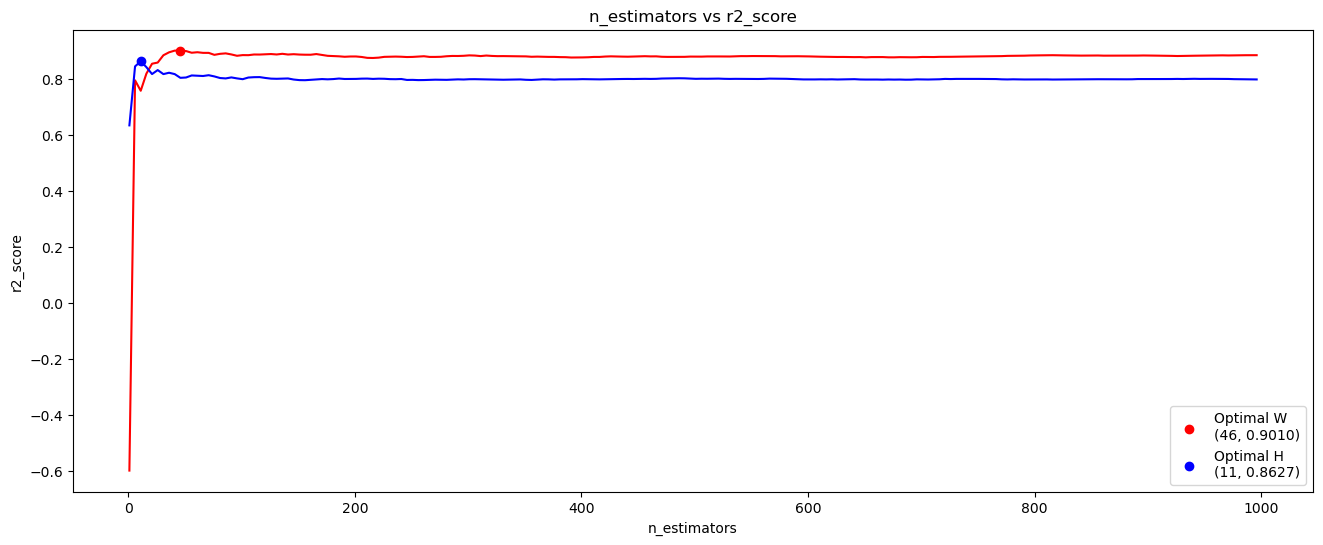

In [31]:
# Find the index of the maximum R^2 score for each target variable
max_index_W = np.argmax(r2_scores_W)
max_index_H = np.argmax(r2_scores_H)

# Get the optimal number of estimators and the corresponding R^2 scores
optimal_n_estimators_W = n_estimators[max_index_W]
optimal_r2_score_W = r2_scores_W[max_index_W]
optimal_n_estimators_H = n_estimators[max_index_H]
optimal_r2_score_H = r2_scores_H[max_index_H]

# plot n_estimators vs r2_scores
plt.figure(figsize=(16, 6))
plt.plot(n_estimators, r2_scores_W, color='red')
plt.plot(n_estimators, r2_scores_H, color='blue')
plt.scatter(optimal_n_estimators_W, optimal_r2_score_W, color='red', label=f'Optimal W\n({optimal_n_estimators_W}, {optimal_r2_score_W:.4f})')
plt.scatter(optimal_n_estimators_H, optimal_r2_score_H, color='blue', label=f'Optimal H\n({optimal_n_estimators_H}, {optimal_r2_score_H:.4f})')
plt.title('n_estimators vs r2_score')
plt.xlabel('n_estimators')
plt.ylabel('r2_score')
plt.legend()
plt.show()

Now that we have identified the optimal number of estimators for our Random Forest Model, we can make the model again with this parameter.  
(Any n_estimator number between our max $R^2$ number and ~200 where the $R^2$ value stabilitzes is acceptable to use. Make sure to not use a value too high or underfitting may occur.)

Random Forest Model:

W Mean Absolute Error: 0.2652
W Mean Squared Error : 0.0990
W R^2 Score          : 0.9010
H Mean Absolute Error: 0.2933
H Mean Squared Error : 0.1373
H R^2 Score          : 0.8627


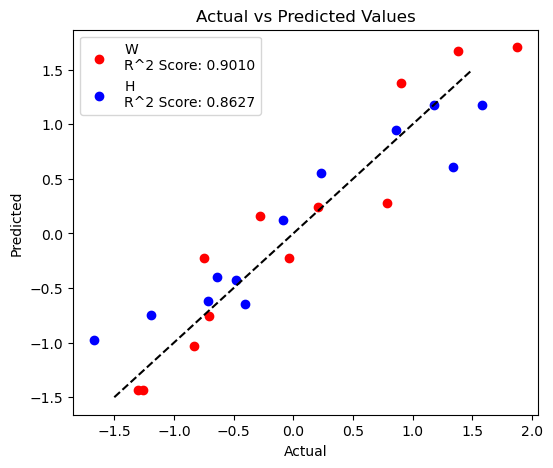

In [32]:
rfr_W = RandomForestRegressor(n_estimators=optimal_n_estimators_W, bootstrap=True, max_features='sqrt', random_state=42)
rfr_H = RandomForestRegressor(n_estimators=optimal_n_estimators_H, bootstrap=True, max_features='sqrt', random_state=42)

# fit
rfr_W.fit(X_train, y_train_W)
rfr_H.fit(X_train, y_train_H)

# predict
y_pred_W = rfr_W.predict(X_test)
y_pred_H = rfr_H.predict(X_test)

print(f"W Mean Absolute Error: {mean_absolute_error(y_test_W, y_pred_W):.4f}")
print(f"W Mean Squared Error : {mean_squared_error(y_test_W, y_pred_W):.4f}")
print(f"W R^2 Score          : {r2_score(y_test_W, y_pred_W):.4f}")

print(f"H Mean Absolute Error: {mean_absolute_error(y_test_H, y_pred_H):.4f}")
print(f"H Mean Squared Error : {mean_squared_error(y_test_H, y_pred_H):.4f}")
print(f"H R^2 Score          : {r2_score(y_test_H, y_pred_H):.4f}")

# Create a scatter plot of the actual vs predicted values for the bead width W and bead height H for the testing dataset.
plt.figure(figsize=(6, 5))
plt.scatter(y_test_W, y_pred_W, color='red', label=f'W\nR^2 Score: {r2_score(y_test_W, y_pred_W):.4f}')
plt.scatter(y_test_H, y_pred_H, color='blue', label=f'H\nR^2 Score: {r2_score(y_test_H, y_pred_H):.4f}')
plt.plot([-1.5, 1.5], [-1.5, 1.5], color='black', linestyle='--') # line plot for comparison
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

The Random Forest Regressor Model is good for this data. It has a high $R^2$ value and the low MSE and MAE values. However, as we did in `2.2`, Multivariable Polynomial Regression is still the best model for this data if the data is thoroughly cleaned. It has an even higher $R^2$ value (over 92% on both W and H testing sets). If some data is not the best though with many outliers, the Random Forest Model is a good alternative.

We can also plot the residuals distribution:

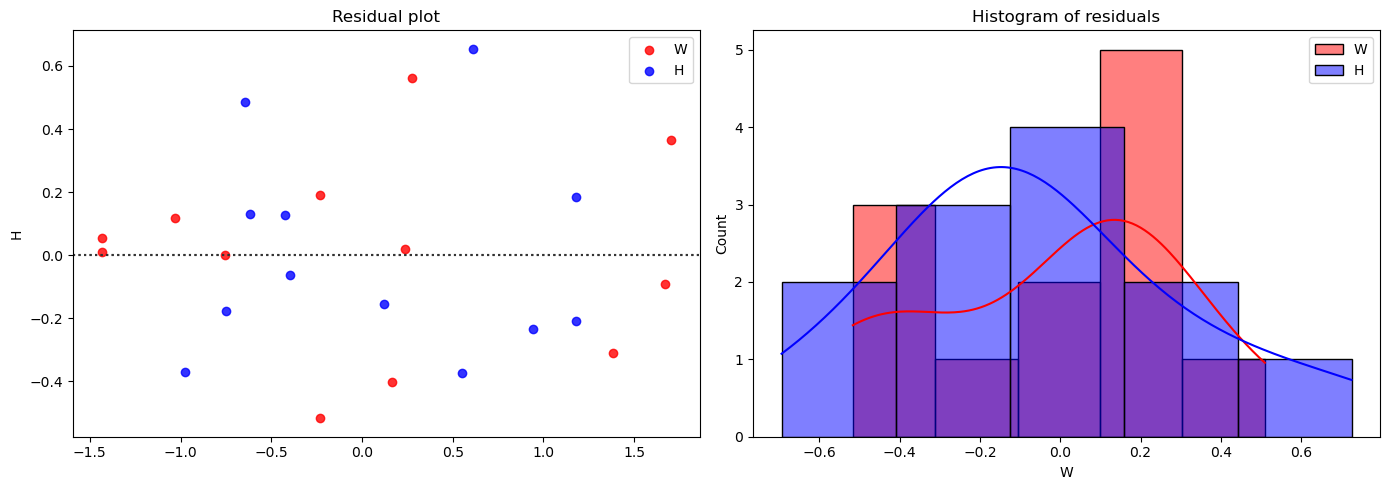

In [33]:
# using seaborn's residplot

residuals_W = y_test_W - y_pred_W
residuals_H = y_test_H - y_pred_H

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Residual scatter plot
sns.residplot(x=y_pred_W, y=residuals_W, color='red', ax=axs[0], label='W')
sns.residplot(x=y_pred_H, y=residuals_H, color='blue', ax=axs[0], label='H')
axs[0].legend()
axs[0].set_title('Residual plot')

# Residual histogram
sns.histplot(residuals_W, color='red', kde=True, ax=axs[1], label='W')
sns.histplot(residuals_H, color='blue', kde=True, ax=axs[1], label='H')
axs[1].legend()
axs[1].set_title('Histogram of residuals')

plt.tight_layout()
plt.show()

The scatter in this residuals plot indicates a good model. The residuals decently normally distributed around 0. There is no drastic overfitting or underfitting.

In [34]:
end_time = time.time()
print(f'Total runtime of this notebook is {(end_time-start_time)/60:0.2f} minutes.')

Total runtime of this notebook is 3.93 minutes.
